In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

In [2]:
train_path='train.csv'
stores_path='store.csv'
test_path='test.csv'

## Training data

In [4]:
train_data=pd.read_csv(train_path,parse_dates=["Date"])
train_data.head()

C:\Users\20122\AppData\Local\Temp\ipykernel_27784\2694247980.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data=pd.read_csv(train_path,parse_dates=["Date"])


Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [5]:
print("Train dataset samples since: ",train_data["Date"].min(),"to: ",train_data["Date"].max())

Train dataset samples since:  2013-01-01 00:00:00 to:  2015-07-31 00:00:00


In [6]:
train_data.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [8]:
#delete duplicates
train_data=train_data.drop_duplicates()

In [9]:
#we have a weird value "0"
train_data["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [10]:
#Removing it
train_data["StateHoliday"]=train_data["StateHoliday"].map({"0":0,"a":"a","b":"b","c":"c"})

In [11]:
#take on count only sales grater than 0
#train_data=train_data[train_data["Sales"]>0]

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>]], dtype=object)

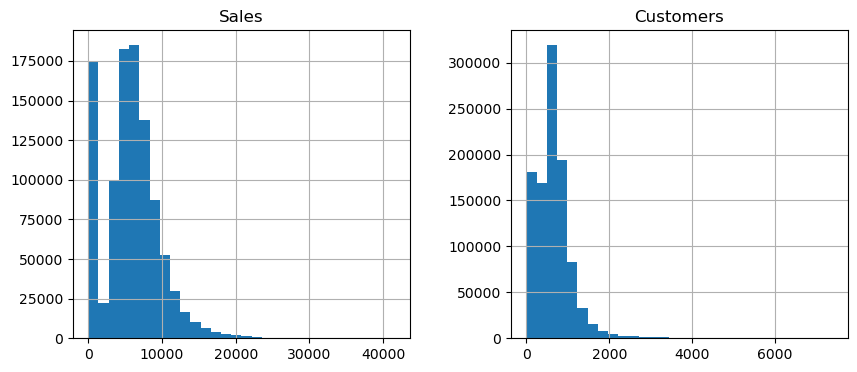

In [12]:
train_data[["Sales","Customers"]].hist(figsize=[10,4],bins=30)

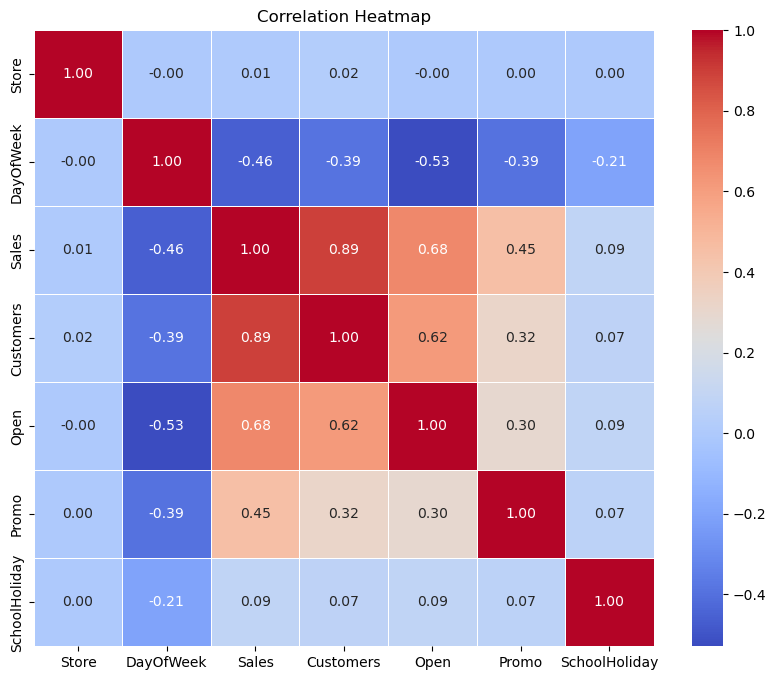

In [13]:
# Create the correlation matrix
corr_matrix = train_data.corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
#sales mean by month by store
monthly_avg_st=pd.DataFrame(train_data[train_data['Sales']>0].groupby(["Store",train_data['Date'].dt.to_period("M")]).mean().reset_index())

In [15]:
monthly_avg_st["Date"]=monthly_avg_st["Date"].astype('datetime64[ns]') 

In [16]:
# Create a time series plot with Plotly Express
fig = px.line(monthly_avg_st, x='Date', y='Sales', markers=True, line_shape='linear', title='Monthly avg sales by store',color="Store")

# Show the plot
fig.show()

In [17]:
#sales mean by month for all Rossman stores
monthly_avg=pd.DataFrame(train_data[train_data['Sales']>0].groupby(train_data['Date'].dt.to_period("M")).mean().reset_index())

In [18]:
monthly_avg["Date"]=monthly_avg["Date"].astype('datetime64[ns]') 

In [19]:
# Create a time series plot with Plotly Express
fig2 = px.line(monthly_avg, x='Date', y='Sales', markers=True, line_shape='linear', title='Rossman monthly avg sales')

# Show the plot
fig2.show()

In [20]:
#sales mean by month for all Rossman stores
yearly_avg=pd.DataFrame(train_data[train_data['Sales']>0].groupby(train_data['Date'].dt.to_period("Y")).mean().reset_index())

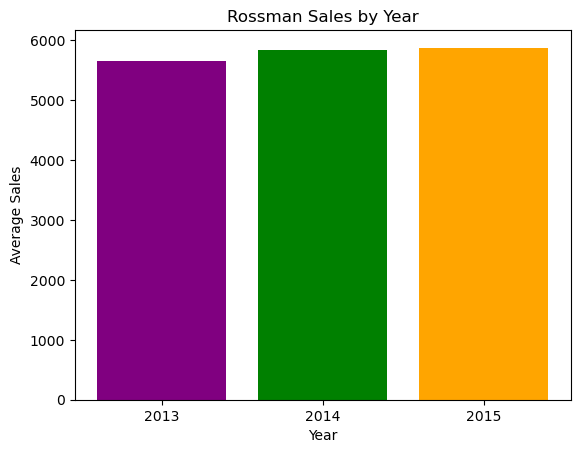

In [21]:
# Group by year and sum the sales
sales_by_year = train_data.groupby(train_data['Date'].dt.to_period("Y"))['Sales'].mean().reset_index()

# Define custom colors for each bar
colors = ['purple', 'green', 'orange']
# Create the histogram
plt.bar(sales_by_year["Date"].astype(str).astype(int), sales_by_year["Sales"],color=colors)
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.title('Rossman Sales by Year')
# Set x-axis ticks to whole numbers
plt.xticks(sales_by_year["Date"].astype(str).astype(int))
plt.show()

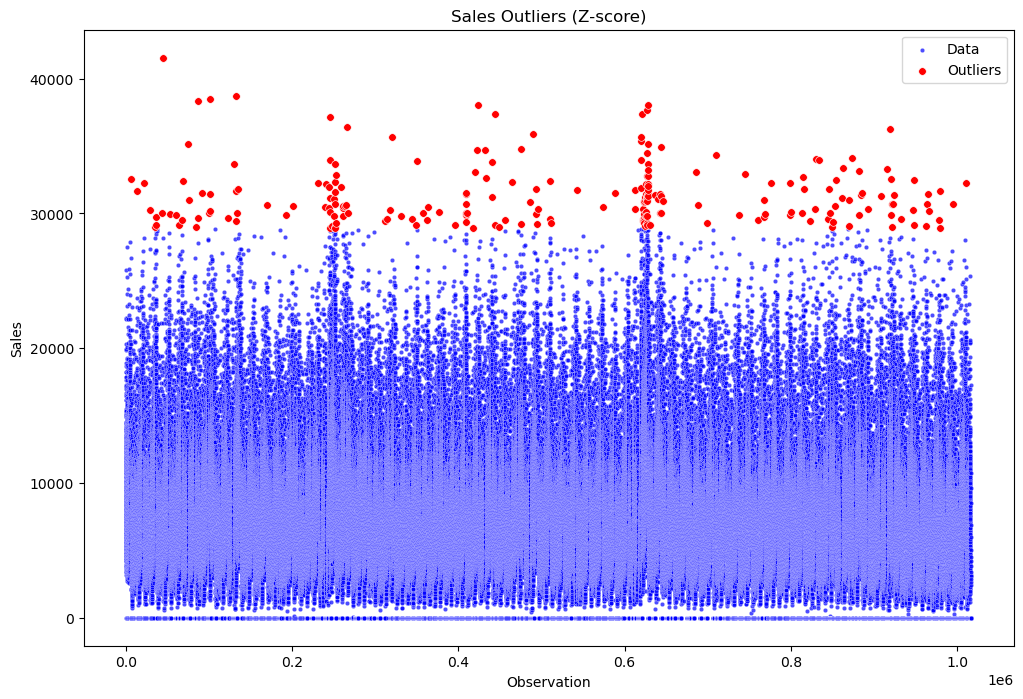

In [22]:
#outliers
# Calculate Z-scores
z_scores = stats.zscore(train_data['Sales'])

# Define a threshold (e.g., 3)
threshold = 6
# Identify outliers
outliers = train_data.index[abs(z_scores) > threshold]

# Create a scatter plot with outliers highlighted in a different color
plt.figure(figsize=(12, 8))
sns.scatterplot(x=train_data.index, y='Sales', data=train_data, color='blue', label='Data', s=10, alpha=0.7)
sns.scatterplot(x=outliers, y=train_data['Sales'].iloc[outliers], color='red', label='Outliers',s=30)
plt.title('Sales Outliers (Z-score)')
plt.xlabel('Observation')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Stores Data

In [23]:
stores_data=pd.read_csv(stores_path)
stores_data.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [24]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [25]:
#fill nule values with 0
nan_cols=["CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]
stores_data[nan_cols]=stores_data[nan_cols].fillna(0)

In [26]:
#fill null values with mean
stores_data["CompetitionDistance"]=stores_data["CompetitionDistance"].fillna(stores_data["CompetitionDistance"].mean())


array([[<AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'Promo2SinceWeek'}>, <AxesSubplot:>]],
      dtype=object)

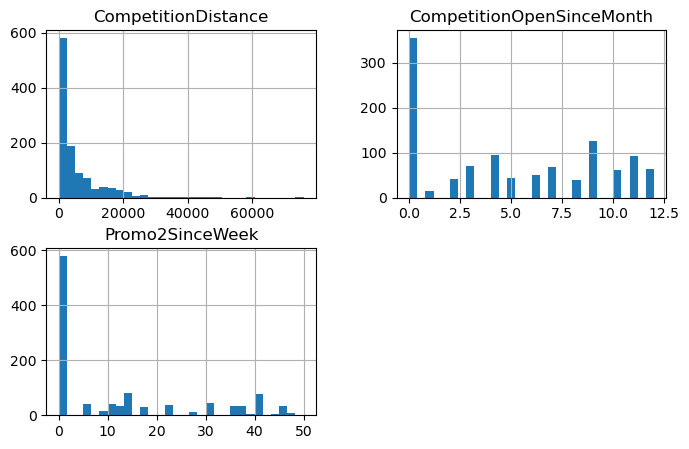

In [27]:
stores_data[["CompetitionDistance","CompetitionOpenSinceMonth","Promo2SinceWeek"]].hist(figsize=[8,5],bins=30)

## merge data

In [55]:
df=train_data.merge(stores_data,on=["Store"], how="left")

In [56]:
#one hote encoding for categorical features
# Apply one-hot encoding to all categorical columns without manual specification
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)
df.head()


Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5 2015-07-31   5263        555     1      1              1   
1      2          5 2015-07-31   6064        625     1      1              1   
2      3          5 2015-07-31   8314        821     1      1              1   
3      4          5 2015-07-31  13995       1498     1      1              1   
4      5          5 2015-07-31   4822        559     1      1              1   

   CompetitionDistance  CompetitionOpenSinceMonth  ...  StoreType_b  \
0               1270.0                        9.0  ...            0   
1                570.0                       11.0  ...            0   
2              14130.0                       12.0  ...            0   
3                620.0                        9.0  ...            0   
4              29910.0                        4.0  ...            0   

   StoreType_c  StoreType_d  Assortment_a  Assortment_b  Assortment_c  \
0            1            0             1             0             0   
1            0            0             1             0             0   
2            0            0             1             0             0   
3            1            0             0             0             1   
4            0            0             1             0             0   

   PromoInterval_0  PromoInterval_Feb,May,Aug,Nov  \
0                1                              0   
1                0                              0   
2                0                              0   
3                1                              0   
4                1                              0   

   PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  
0                              0                               0  
1                              1                               0  
2                              1                               0  
3                              0                               0  
4                              0                               0  

[5 rows x 29 columns]

In [30]:
df.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  CompetitionDistance  \
count  1.017209e+06   1.017209e+06         1.017209e+06   
mean   3.815145e-01   1.786467e-01         5.430020e+03   
std    4.857586e-01   3.830564e-01         7.705298e+03   
min    0.000000e+00   0.000000e+00         2.000000e+01   
25%    0.000000e+00   0.000000e+00         7.100000e+02   
50%    0.000000e+00   0.000000e+00         2.330000e+03   
75%    1.000000e+00   0.000000e+00         6.880000e+03   
max    1.000000e+00   1.000000e+00         7.586000e+04   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  ...   StoreType_b  \
count               1.017209e+06              1.017209e+06  ...  1.017209e+06   
mean                4.926878e+00              1.370173e+03  ...  1.556219e-02   
std                 4.283543e+00              9.353634e+02  ...  1.237741e-01   
min                 0.000000e+00              0.000000e+00  ...  0.000000e+00   
25%                 0.000000e+00              0.000000e+00  ...  0.000000e+00   
50%                 4.000000e+00              2.006000e+03  ...  0.000000e+00   
75%                 9.000000e+00              2.011000e+03  ...  0.000000e+00   
max                 1.200000e+01              2.015000e+03  ...  1.000000e+00   

        StoreType_c   StoreType_d  Assortment_a  Assortment_b  Assortment_c  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   1.345250e-01  3.076182e-01  5.283526e-01  8.153683e-03  4.634937e-01   
std    3.412156e-01  4.615078e-01  4.991957e-01  8.992891e-02  4.986658e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

       PromoInterval_0  PromoInterval_Feb,May,Aug,Nov  \
count     1.017209e+06                   1.017209e+06   
mean      4.994362e-01                   1.165896e-01   
std       4.999999e-01                   3.209308e-01   
min       0.000000e+00                   0.000000e+00   
25%       0.000000e+00                   0.000000e+00   
50%       0.000000e+00                   0.000000e+00   
75%       1.000000e+00                   0.000000e+00   
max       1.000000e+00                   1.000000e+00   

       PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  
count                   1.017209e+06                    1.017209e+06  
mean                    2.881630e-01                    9.581119e-02  
std                     4.529076e-01                    2.943323e-01  
min                     0.000000e+00                    0.000000e+00  
25%                     0.000000e+00                    0.000000e+00  
50%                     0.000000e+00                    0.000000e+00  
75%                     1.000000e+00                    0.000000e+00  
max                     1.000000e+00                    1.000000e+00  

[8 rows x 28 columns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 29 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   SchoolHoliday                   1017209 non-null  int64         
 8   CompetitionDistance             1017209 non-null  float64       
 9   CompetitionOpenSinceMonth       1017209 non-null  float64       
 10  CompetitionOpenSinceYear        1017209 no

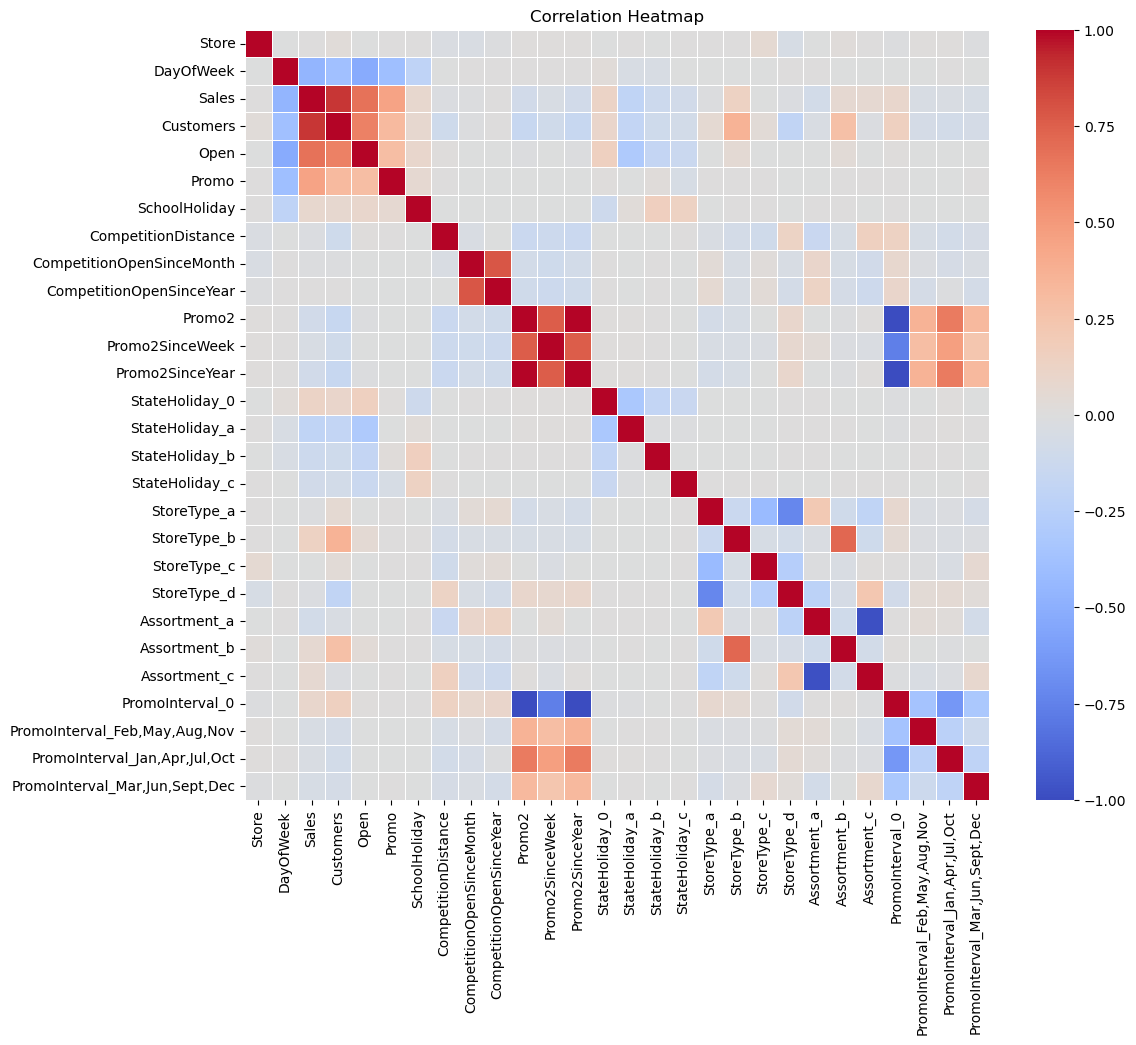

In [32]:
# Create the correlation matrix
corr_matrix = df.corr()

# Create the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [57]:
#remove customers column, we cant useit for the model
df=df.drop("Customers",axis=1)

In [58]:
#Extracting components from date
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df=df.drop("Date",axis=1)

In [59]:
#adjust column order
df=df[['Store', 'DayOfWeek', 'Day', 'Month', 'Year', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec' , 'Sales']]

In [60]:
#save the file
df.to_csv("clean_train.csv")

## Processing test data

In [35]:
test_data=pd.read_csv(test_path,parse_dates=["Date"])
test_data.head()

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4 2015-09-17   1.0      1            0              0
1   2      3          4 2015-09-17   1.0      1            0              0
2   3      7          4 2015-09-17   1.0      1            0              0
3   4      8          4 2015-09-17   1.0      1            0              0
4   5      9          4 2015-09-17   1.0      1            0              0

In [36]:
print("Test dataset samples since: ",test_data["Date"].min(),"to: ",test_data["Date"].max())

Test dataset samples since:  2015-08-01 00:00:00 to:  2015-09-17 00:00:00


In [37]:
train_data.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   886137 non-null   object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 109.9+ MB


### merge data

In [61]:
df_test=test_data.merge(stores_data,on=["Store"], how="left")

In [62]:
#one hote encoding for categorical features
# Apply one-hot encoding to all categorical columns without manual specification
df_test = pd.get_dummies(df_test, columns=df_test.select_dtypes(include=['object']).columns)
df_test.head()

Id  Store  DayOfWeek       Date  Open  Promo  SchoolHoliday  \
0   1      1          4 2015-09-17   1.0      1              0   
1   2      3          4 2015-09-17   1.0      1              0   
2   3      7          4 2015-09-17   1.0      1              0   
3   4      8          4 2015-09-17   1.0      1              0   
4   5      9          4 2015-09-17   1.0      1              0   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1              14130.0                       12.0                    2006.0   
2              24000.0                        4.0                    2013.0   
3               7520.0                       10.0                    2014.0   
4               2030.0                        8.0                    2000.0   

   ...  StoreType_b  StoreType_c  StoreType_d  Assortment_a  Assortment_b  \
0  ...            0            1            0             1             0   
1  ...            0            0            0             1             0   
2  ...            0            0            0             0             0   
3  ...            0            0            0             1             0   
4  ...            0            0            0             0             0   

   Assortment_c  PromoInterval_0  PromoInterval_Feb,May,Aug,Nov  \
0             0                1                              0   
1             0                0                              0   
2             1                1                              0   
3             0                1                              0   
4             1                1                              0   

   PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  
0                              0                               0  
1                              1                               0  
2                              0                               0  
3                              0                               0  
4                              0                               0  

[5 rows x 26 columns]

In [65]:
#adding some missing columns
df_test["StateHoliday_b"]=0
df_test["StateHoliday_c"]=0

#Extracting components from date
df_test['Date'] = pd.to_datetime(df_test['Date'])

df_test['Year'] = df_test['Date'].dt.year
df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day

df_test=df_test.drop("Date",axis=1)

In [66]:
#adjust column order
df_test=df_test[["Id",'Store', 'DayOfWeek', 'Day', 'Month', 'Year', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec']]

In [68]:
df_test.to_csv("clean_test.csv")